# BOSTON HOUSE PRICE PREDICTION USING LINEAR REGRESSION

### Author : Helana Kuriakose

# Problem

Boston is a famous town in US. The different factors that affecting the house price in the city is given in a dataset.So make a predicive system for predicting the rate of the house in Boston.

# Workflow

##### 1)	Data collection 

##### 2)    Data Pre-processing

##### 3)	Train – Test data

##### 4)	Model Training

##### 5)	Model Evaluation

##### 6)	Making Prediction

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Data collection and pre-processing

In [2]:
# loading dataset

from sklearn.datasets import load_boston
df = load_boston()

In [3]:
df.keys() 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# covert the data set into pandas data frame

boston = pd.DataFrame(df.data, columns=df.feature_names)

In [6]:
# getting the attributes

boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
# first 5 records

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
boston.shape

(506, 13)

In [10]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# Handling missing values

In [12]:
# checking the NaN values

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Handling duplicate values

In [13]:
# checking the duplicate values

boston.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [14]:
boston.duplicated().sum()

0

Now we are adding a new column to the dataframe for target variable.

In [15]:
boston['MEDV'] = df.target

In [16]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Now we are dividing the data into dependent(target variable) and independent variables.

In [18]:
target_variable = boston['MEDV']
y = target_variable
x = boston.drop(['MEDV'], axis = 1)

# Train - Test split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [20]:
# checking the size of train and test set

print("x size :",x.shape)
print("x-train size :",x_train.shape)
print("x_test size :",x_test.shape)
print("y size :",y.shape)
print("y-train size :",y_train.shape)
print("y_test size :",y_test.shape)

x size : (506, 13)
x-train size : (404, 13)
x_test size : (102, 13)
y size : (506,)
y-train size : (404,)
y_test size : (102,)


# Model training

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

# Model evaluation

In [22]:
# checking the training score

training_score = round(regression.score(x_train,y_train)*100,3)
print("The training score is",training_score)

The training score is 72.394


Now we are going to predicting the value.

In [23]:
y_pred = regression.predict(x_test)

Finding r2 score (testing score)

In [24]:
from sklearn.metrics import r2_score
r2score = round(r2_score(y_pred, y_test)*100,3)
print("The r2 score is",r2score)

The r2 score is 67.755


r2 score is less than training score.

Since r2 score is less as comparred to training score, we will check the evaluation metics.
ie ABSOLUTE ERROR, MEAN SQUARED ERROR, ROOT MEAN SQUARED ERROR

In [25]:
from sklearn import metrics
print("Absolute Error of the Test data of Linear regression is",metrics.mean_absolute_error(y_pred, y_test))
print("Mean Squared Error of Test data of Linear regression is",metrics.mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error of Test data of Linear regression is",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Absolute Error of the Test data of Linear regression is 3.0142502752403373
Mean Squared Error of Test data of Linear regression is 16.943073013833754
Root Mean Squared Error of Test data of Linear regression is 4.11619642556496


Now let's check the difference between the predicted value and actual value.

In [26]:
boston_1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'varience':y_test-y_pred})
boston_1.head()

,Actual,Predicted,varience
224,44.8,37.541576,7.258424
137,17.1,18.764836,-1.664836
453,17.8,22.369839,-4.569839
303,33.1,32.801954,0.298046
254,21.9,24.280670,-2.380670


In [27]:
boston.tail(55)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
451,5.44114,0.0,18.10,0.0,0.713,6.655,98.2,2.3552,24.0,666.0,20.2,355.29,17.73,15.2
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
453,8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74,17.8
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13,14.1
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,14.9
459,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,396.90,14.70,20.0
460,4.81213,0.0,18.10,0.0,0.713,6.701,90.0,2.5975,24.0,666.0,20.2,255.23,16.42,16.4


# Making a predictive system

In [28]:
input_data = [8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74]
input_data_as_array = np.array(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = regression.predict(input_data_reshaped)
print("The House price is",prediction)

The House price is [22.36983893]


In [29]:
# finding intercept

regression.intercept_

35.86168334503573

In [30]:
# finding coefficient

regression.coef_

array([-1.23897571e-01,  4.81822924e-02, -4.74497796e-02,  3.36938950e+00,
       -1.56635488e+01,  3.59419367e+00, -9.33206067e-03, -1.47089101e+00,
        3.05053544e-01, -1.08397039e-02, -9.08791339e-01,  1.00352939e-02,
       -4.77714677e-01])

Now  we are going to plot the regression coefficients.

In [31]:
li_coefficient = pd.DataFrame()
li_coefficient['Columns'] = x.columns
li_coefficient['Coefficients'] = pd.Series(regression.coef_)
li_coefficient

,Columns,Coefficients
0,CRIM,-0.123898
1,ZN,0.048182
2,INDUS,-0.047450
3,CHAS,3.369389
4,NOX,-15.663549
5,RM,3.594194
6,AGE,-0.009332
7,DIS,-1.470891
8,RAD,0.305054
9,TAX,-0.010840


Finding the difference between actual and prdicted value using Data visualization

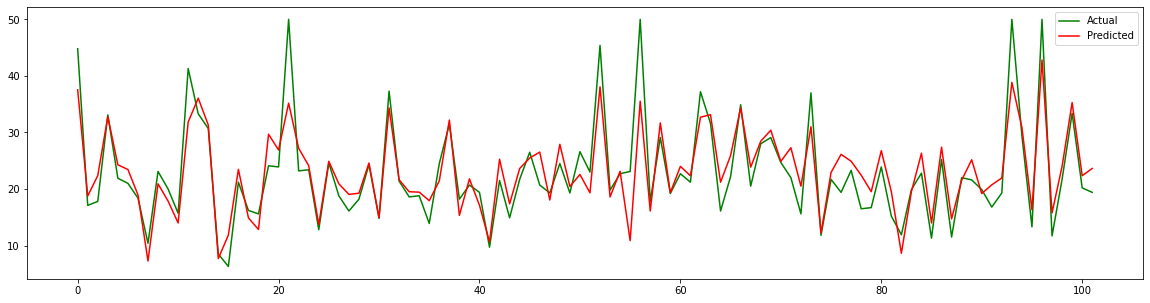

In [32]:
plt.figure(figsize=(20,5))
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, color = "green", label = "Actual")
plt.plot(x_ax, y_pred, color = "red", label = "Predicted")
plt.legend()
plt.show()

Fitting the Regression line.

Text(0, 0.5, 'Predicted')

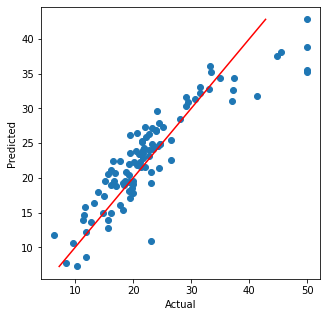

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred),max(y_pred)],[min(y_pred),max(y_pred)], color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')